In [55]:
# Exemplo de como usar  graphviz
import pandas as pd
from graphviz import Digraph

# Criar um novo grafo direcionado
grafo = Digraph()

# Adicionar nós e arestas ao grafo
grafo.node('A')
grafo.node('B')
grafo.edge('A', 'B')

# Visualizar o grafo
grafo.render('meu_grafo', format='png', cleanup=True)

'meu_grafo.png'

In [1]:
import pandas

#Função para organizar e importar o arquivo
def import_csv(file_path):
    #o pandas tem várias funções para ler diferentes tipos de arquivos
    event_log = pandas.read_csv(file_path, sep=';') #PARAMETROS: arquivo; 'sep' define que tipo de separação o arquivo tem, geralmente tem ',' como default
    #event_log agora é uma 'tabela'
    num_events = event_log
    #.unique() retorna uma lista do id dos quantos clientes
    num_cases = len(event_log.case_id.unique())
    print("Number of events: {}\nNumber of cases: {}".format(num_events, num_cases))

#forma de organizar o codigo: é uma prática padrão em Python para diferenciar a execução direta de um script da sua importação como um módulo.
if __name__ == "__main__":
    import_csv("C:\\Users\\meduarda\\grupo-2\\Bases_de_Dados\\running-example_3.csv")

Number of events:     case_id            activity                  timestamp  costs resource
0         3    register request  2010-12-30 14:32:00+01:00     50     Pete
1         3    examine casually  2010-12-30 15:06:00+01:00    400     Mike
2         3        check ticket  2010-12-30 16:34:00+01:00    100    Ellen
3         3              decide  2011-01-06 09:18:00+01:00    200     Sara
4         3  reinitiate request  2011-01-06 12:18:00+01:00    200     Sara
5         3  examine thoroughly  2011-01-06 13:06:00+01:00    400     Sean
6         3        check ticket  2011-01-08 11:43:00+01:00    100     Pete
7         3              decide  2011-01-09 09:55:00+01:00    200     Sara
8         3    pay compensation  2011-01-15 10:45:00+01:00    200    Ellen
9         2    register request  2010-12-30 11:32:00+01:00     50     Mike
10        2        check ticket  2010-12-30 12:12:00+01:00    100     Mike
11        2    examine casually  2010-12-30 14:16:00+01:00    400     Sean
12     

In [ ]:
import pandas


def import_csv(file_path):
    event_log = pandas.read_csv(file_path, sep=';')
    num_cases = event_log.case_id
    #organiza a lista em ordem de eventos pelo tempo
    clients = sorted(event_log.timestamp)
    listaOrganizada = list(zip(num_cases, clients))
    print("Linha Temporal: {}\nLista de eventos organizado: {}".format(clients, listaOrganizada))


if __name__ == "__main__":
    import_csv("C:\\Users\\meduarda\\grupo-2\\Bases_de_Dados\\running-example.csv")

Linha Temporal: ['2010-12-30 11:02:00+01:00', '2010-12-30 11:32:00+01:00', '2010-12-30 12:12:00+01:00', '2010-12-30 14:16:00+01:00', '2010-12-30 14:32:00+01:00', '2010-12-30 15:06:00+01:00', '2010-12-30 16:34:00+01:00', '2010-12-31 10:06:00+01:00', '2011-01-05 11:22:00+01:00', '2011-01-05 15:12:00+01:00', '2011-01-06 09:02:00+01:00', '2011-01-06 09:18:00+01:00', '2011-01-06 11:18:00+01:00', '2011-01-06 12:18:00+01:00', '2011-01-06 13:06:00+01:00', '2011-01-06 15:02:00+01:00', '2011-01-06 15:02:00+01:00', '2011-01-06 16:06:00+01:00', '2011-01-07 10:16:00+01:00', '2011-01-07 12:06:00+01:00', '2011-01-07 14:24:00+01:00', '2011-01-07 16:22:00+01:00', '2011-01-07 16:52:00+01:00', '2011-01-08 11:22:00+01:00', '2011-01-08 11:43:00+01:00', '2011-01-08 12:05:00+01:00', '2011-01-08 14:43:00+01:00', '2011-01-09 09:55:00+01:00', '2011-01-09 12:02:00+01:00', '2011-01-10 13:28:00+01:00', '2011-01-11 16:18:00+01:00', '2011-01-12 15:44:00+01:00', '2011-01-14 14:33:00+01:00', '2011-01-15 10:45:00+01:00

In [26]:
import pandas as pd
import graphviz as gv
from graphviz import Digraph
from datetime import datetime
import pm4py
import os

def import_csv(file_path):
    event_log = pd.read_csv(file_path, sep=';')
    event_log['timestamp'] = pd.to_datetime(event_log['timestamp'])

    grafo = Digraph()
    
    # Criação de nós com IDs únicos e labels de timestamp
    for i, row in event_log.iterrows():
        timestamp_str = row['timestamp'].strftime('%Y-%m-%d %H:%M:%S')
        grafo.node(str(i), label=timestamp_str)
    
    # Criação de arestas entre eventos sequenciais
    for i in range(len(event_log) - 1):
        grafo.edge(str(i), str(i + 1))

    # grafo.render('meu_grafo', format='png', cleanup=True)

if __name__ == "__main__":
    import_csv("C:\\Users\\meduarda\\grupo-2\\Bases_de_Dados\\running-example_3.csv")

# não é uma rede de petri, eu estou aprendendo a usar o graphviz ainda

In [4]:
import pandas as pd

def import_csv(file_path):
    event_log = pd.read_csv(file_path, sep=';')
    
    # Converter a coluna 'timestamp' para o formato de data/hora
    event_log['timestamp'] = pd.to_datetime(event_log['timestamp'])
    
    # Calcular o tempo gasto em cada ação para todos os pacientes
    action_times = {}
    for action in event_log.activity.unique():
        action_group = event_log[event_log['activity'] == action]
        action_times[action] = action_group['timestamp'].max() - action_group['timestamp'].min()
    
    # Calcular a média dos tempos em segundos
    total_time_seconds = sum(action_times.values(), pd.Timedelta(0)).total_seconds()
    num_patients = len(event_log['case_id'].unique())
    average_time_seconds = total_time_seconds / num_patients
    
    # Converter a média de volta para um objeto Timedelta
    average_time = pd.Timedelta(seconds=average_time_seconds)
    
    # Imprimir o resultado para todas as ações
    for action, time in action_times.items():
        total_seconds = time.total_seconds()
        minutes, seconds = divmod(total_seconds, 60)
        print(f"Ação: {action} - Tempo médio: {minutes:.0f} minutos e {seconds:.0f} segundos")
        
    
    print(f"Tempo médio total: {average_time}")

if __name__ == "__main__":
    file_path = "C:\\Users\\meduarda\\grupo-2-1\\Bases_de_Dados\\running-example_3.csv" 
    import_csv(file_path)


['register request' 'examine casually' 'check ticket' 'decide'
 'reinitiate request' 'examine thoroughly' 'pay compensation'
 'reject request']
Tempo médio total: 19 days 08:53:50


In [5]:
import pandas as pd
import pm4py
import os
from graphviz import Digraph

def import_csv(file_path):
    # Carregar o log de eventos a partir do arquivo CSV
    event_log = pd.read_csv(file_path, sep=';')
    # Dicionário parra cada pessoa
    dicPessoa = dict()
    listaPessoas = list(event_log['case_id'])
    listaProcessos = list(event_log['activity'])
    listaPeriodos = list(event_log['timestamp'])
    
    dicPessoas = {}
    for (i,pessoa) in enumerate(listaPessoas):
        if pessoa in dicPessoas:
            dicPessoas[pessoa] += tuple([[listaProcessos[i],listaPeriodos[i]]])
        else:
            dicPessoas[pessoa] = tuple([[listaProcessos[i],listaPeriodos[i]]])
    print(dicPessoas)

    # print(listaAtividades)
    # print(listaCasos)
    
if __name__ == "__main__":
    file_path = "C:\\Users\\meduarda\\grupo-2-2\\Bases_de_Dados\\running-example_3.csv"
    import_csv(file_path)

{3: (['register request', '2010-12-30 14:32:00+01:00'], ['examine casually', '2010-12-30 15:06:00+01:00'], ['check ticket', '2010-12-30 16:34:00+01:00'], ['decide', '2011-01-06 09:18:00+01:00'], ['reinitiate request', '2011-01-06 12:18:00+01:00'], ['examine thoroughly', '2011-01-06 13:06:00+01:00'], ['check ticket', '2011-01-08 11:43:00+01:00'], ['decide', '2011-01-09 09:55:00+01:00'], ['pay compensation', '2011-01-15 10:45:00+01:00']), 2: (['register request', '2010-12-30 11:32:00+01:00'], ['check ticket', '2010-12-30 12:12:00+01:00'], ['examine casually', '2010-12-30 14:16:00+01:00'], ['decide', '2011-01-05 11:22:00+01:00'], ['pay compensation', '2011-01-08 12:05:00+01:00']), 1: (['register request', '2010-12-30 11:02:00+01:00'], ['examine thoroughly', '2010-12-31 10:06:00+01:00'], ['check ticket', '2011-01-05 15:12:00+01:00'], ['decide', '2011-01-06 11:18:00+01:00'], ['reject request', '2011-01-07 14:24:00+01:00']), 6: (['register request', '2011-01-06 15:02:00+01:00'], ['examine ca

In [ ]:
import pandas
from datetime import datetime as dt

if __name__ == "__main__":
    log = pandas.read_csv('C:\\Users\\meduarda\\grupo-2-2\\Bases_de_Dados\\running-example_3.csv', sep = ';')

    listaAtividades = list(log.activity)
    listaCasos = list(log.case_id)
    listaHoras = list(log.timestamp)

    for (i, hora) in enumerate(listaHoras):
        hora = dt.strptime(hora,"%Y-%m-%d %H:%M:%S%z")
        listaHoras[i] = hora.replace(tzinfo=None)

    dicPessoas = {}
    for (i,pessoa) in enumerate(listaCasos):
        if pessoa in dicPessoas:
            dicPessoas[pessoa] += tuple([[listaAtividades[i],listaHoras[i]]])
        else:
            dicPessoas[pessoa] = tuple([[listaAtividades[i],listaHoras[i]]])

    
    dicIntervalos = {}

    for key in dicPessoas:
        listaVazia = []
        for atividades in dicPessoas[key]:
            listaVazia.append(atividades)
        for (i,el) in enumerate(listaVazia):
            if el[0] not in dicIntervalos:
                if i == (len(listaVazia)-1):
                    dicIntervalos[el[0]] == 0
                else:
                    dicIntervalos[el[0]] = listaVazia[i+1][1] - el[1]
            else:
                dicIntervalos[el[0]] += listaVazia[i+1][1] - el[1]

    print(dicIntervalos)

FUNÇÕES INTERESSANTES:
### pm4py
.format_dataframe() --- cria uma cópia do log de eventos e renomeia as colunas para nomes padroes do pm4py(arquivos csv).
.read_xes(file_path) --- carrega um arquivo xes para o pm4py como um objeto Log de Eventos
.get_start_activities(event_log) ---
get_end_activities(event_log) ---
.write_xes() --- transforma um quadro de dados do pandas em um arq .xes
.convert_to_dataframe() --- converte o log de eventos em quadro de dados que pode ser exportado com o pandas (ex:transformar em csv)
### pandas
.read_csv(<<caminho do código>>, sep=';')
event_log.to_csv() --- importa o arquivo csv de exemplo em execução como um quadro de dados do pandas e o exporta para um arquivo csv no local
### graphviz


Criando imagens com o arquivo padrão do pm4py

In [29]:
import pandas


def import_csv(file_path):
    event_log = pandas.read_csv(file_path, sep=';')
    num_events = len(event_log)
    num_cases = len(event_log.case_id.unique())
    event_log = pm4py.format_dataframe(event_log, case_id='case_id', activity_key='activity', timestamp_key='timestamp')
    start_activities = pm4py.get_start_activities(event_log)
    end_activities = pm4py.get_end_activities(event_log)
    print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))
    print("Number of events: {}\nNumber of cases: {}".format(num_events, num_cases))


if __name__ == "__main__":
    import_csv("C:\\Users\\meduarda\\grupo-2-3\\Bases_de_Dados\\running-example_3.csv")

Start activities: {'register request': 6}
End activities: {'reject request': 3, 'pay compensation': 3}
Number of events: 42
Number of cases: 6


parsing log, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 2599.51it/s]


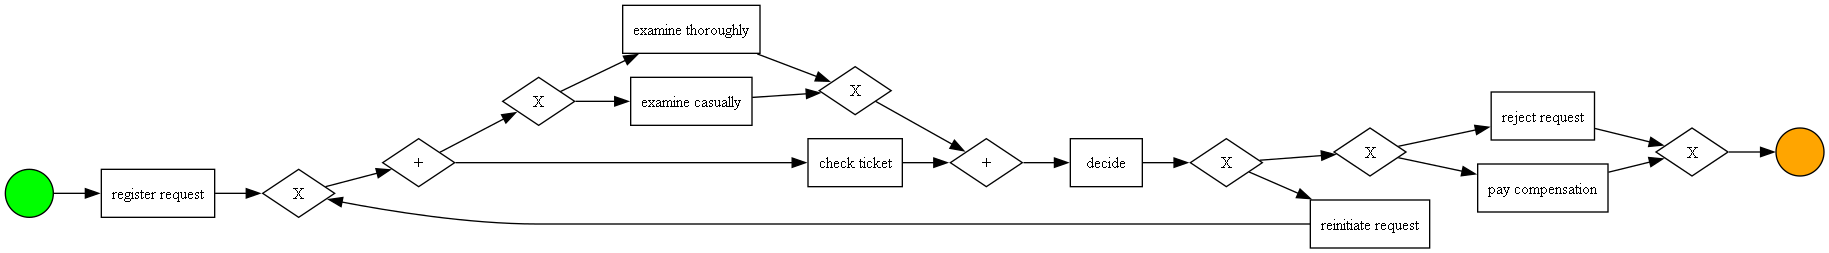

          concept:name            time:timestamp  cost:total org:resource  \
0     register request 2010-12-30 11:02:00+00:00          50         Pete   
1   examine thoroughly 2010-12-31 10:06:00+00:00         400          Sue   
2         check ticket 2011-01-05 15:12:00+00:00         100         Mike   
3               decide 2011-01-06 11:18:00+00:00         200         Sara   
4       reject request 2011-01-07 14:24:00+00:00         200         Pete   
5     register request 2010-12-30 11:32:00+00:00          50         Mike   
6         check ticket 2010-12-30 12:12:00+00:00         100         Mike   
7     examine casually 2010-12-30 14:16:00+00:00         400         Sean   
8               decide 2011-01-05 11:22:00+00:00         200         Sara   
9     pay compensation 2011-01-08 12:05:00+00:00         200        Ellen   
10    register request 2010-12-30 14:32:00+00:00          50         Pete   
11    examine casually 2010-12-30 15:06:00+00:00         400         Mike   

In [158]:
import pm4py
import datetime as dt

def import_xes(file_path):
    event_log = pm4py.read_xes(file_path)
    start_activities = pm4py.get_start_activities(event_log)
    end_activities = pm4py.get_end_activities(event_log)
    process_tree = pm4py.discover_process_tree_inductive(event_log)
    bpmn_model = pm4py.convert_to_bpmn(process_tree)
    pm4py.view_bpmn(bpmn_model)
    #print('FILTRA OS ATENDENTES APENAS EM PETE:\n', filltred)
    filltred = pm4py.filter_event_attribute_values(event_log, attribute_key='org:resource', values={'Pete'}, level='event')
    #filtra apenas trilhas onde diuas atividades acontecem simultaneametnte
    filtered5 = pm4py.filter_eventually_follows_relation(event_log, [('examine casually', 'reject request')])
    #filtra o log de eventos baseado num determinado intervalo de tempo
    filtered6 = pm4py.filter_time_range(event_log, dt.datetime(2010, 12, 10), dt.datetime(2011, 1, 1), mode='events')
    #filtra o log de eventos baseado num determinado intervalo de tempo, pega qualquer caminho que contém pelo menos um evento que se enquadre no caminho
    filtered6 = pm4py.filter_time_range(event_log, dt.datetime(2010, 12, 10), dt.datetime(2011, 1, 1), mode='traces_intersecting')

    # ainda não entendi o que faz
    filtered2 = pm4py.filter_trace_attribute_values(event_log, 'concept:name', {'3', '4'}, retain=False)
    
    # ainda não entendi o que faz também
    filtered3 = pm4py.filter_variants(event_log, [['register request', 'examine casually']])

    # ainda não entendi o que faz também
    filtered4 = pm4py.filter_directly_follows_relation(event_log, [('register request', 'reject request')], retain=True)




if __name__ == "__main__":
    import_xes("C:\\Users\\meduarda\\Downloads\\running-example.xes")


# if __name__ == "__main__":
#     event_log = pm4py.read_xes('C:\\Users\\meduarda\\Downloads\\running-example.xes')
#     pm4py.write_xes(event_log, 'C:\\Users\\meduarda\\grupo-2-3\\Bases_de_Dados\\running-example-exported.xes')